<a href="https://colab.research.google.com/github/trentfridey/qosf-screening/blob/master/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.1.0
!pip install tensorflow-quantum

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 35.7MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 3.9MB 38.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=c8dd0f70d6548f34bf410e867dc577dd174d8dd39042d359bb34092eeddb4819
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninsta

In [1]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [4]:
a, b = sympy.symbols('a b')

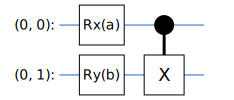

In [7]:
q0, q1 = cirq.GridQubit.rect(1,2)

circuit = cirq.Circuit(
    cirq.rx(a).on(q0),
    cirq.ry(b).on(q1),
    cirq.CNOT(control=q0, target=q1)
)

SVGCircuit(circuit)

# Task 1

Initialize the state of 4 qubits $|\psi_0\rangle = |0000\rangle$.

The circuit will consist of a number of layers $L$, each composed of a even and odd block.

The odd block implements the unitary:

$$
U_{2k+1} (\theta_{2k+1}) = R_x(\theta_{2k+1,1})\otimes R_x(\theta_{2k+1,2}) \otimes R_x(\theta_{2k+1,3}) \otimes R_x(\theta_{2k+1,4})
$$

Whereas the even block implements

$$
U_{2k} (\theta_{2k}) = CZ(3,4)CZ(2,4)CZ(2,3)CZ(1,4)CZ(1,3)CZ(1,2)[R_z(\theta_{2k,1})\otimes R_z(\theta_{2k,2}) \otimes R_z(\theta_{2k,3}) \otimes R_z(\theta_{2k,4})]
$$

Let's implement the blocks using Cirq:

In [8]:
# initialize our qubits:

q0, q1, q2, q3 = [cirq.GridQubit(x,y) for x in range(2) for y in range(2)]

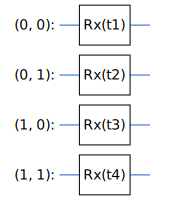

In [17]:
# Lets construct the Odd layer first
# We will need the Rx gate as well as 4 parameters

t1, t2, t3, t4 = sympy.symbols('t1:5')
odd = cirq.Circuit(
    cirq.rx(t1).on(q0),
    cirq.rx(t2).on(q1),
    cirq.rx(t3).on(q2),
    cirq.rx(t4).on(q3)
)

SVGCircuit(odd)

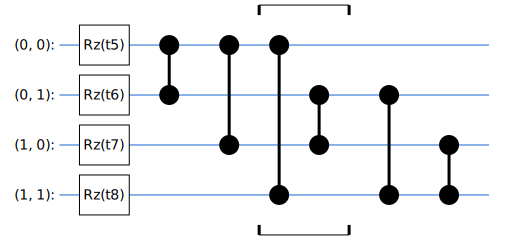

In [18]:
# Now we construct the even layer
# We need four more parameters

t5,t6,t7,t8 = sympy.symbols('t5:9')
even = cirq.Circuit(
    cirq.rz(t5).on(q0),
    cirq.rz(t6).on(q1),
    cirq.rz(t7).on(q2),
    cirq.rz(t8).on(q3),
    cirq.CZ(q0, q1),
    cirq.CZ(q0, q2),
    cirq.CZ(q0, q3),
    cirq.CZ(q1, q2),
    cirq.CZ(q1, q3),
    cirq.CZ(q2, q3),
)

SVGCircuit(even)

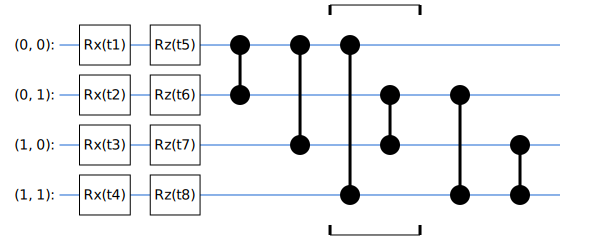

In [23]:
# Now we can combine them into one layer

one_layer = cirq.Circuit(
    cirq.rx(t1).on(q0),
    cirq.rx(t2).on(q1),
    cirq.rx(t3).on(q2),
    cirq.rx(t4).on(q3),
    cirq.rz(t5).on(q0),
    cirq.rz(t6).on(q1),
    cirq.rz(t7).on(q2),
    cirq.rz(t8).on(q3),
    cirq.CZ(q0, q1),
    cirq.CZ(q0, q2),
    cirq.CZ(q0, q3),
    cirq.CZ(q1, q2),
    cirq.CZ(q1, q3),
    cirq.CZ(q2, q3),
)
SVGCircuit(one_layer)

The figure of interest at this stage is the final state, $|\psi(\vec{\theta})\rangle$, and the quantity:

$$
\delta = || |\psi(\vec{\theta})\rangle - |\phi\rangle ||
= \sum_{i,j,k,l}|c_{ijkl}|^2
$$

$$
c_{ijkl} = \langle ijkl|\psi(\vec{\theta})\rangle - \langle ijkl|\phi\rangle
$$

Where $|\phi\rangle$ is a randomly generated state

In [24]:
# Calculate the final state
# For the current example, we need to pick values for our parameters

params = {t1: 0, t2: 0.5, t3: 0.5, t4: 0.3, t5: 0.2, t6: 0.7, t7: 0.1, t8: 0}

resolver = cirq.ParamResolver(params)
final_state = cirq.Simulator().simulate(one_layer, resolver).final_state
final_state


array([ 0.8146157 -0.4450266j , -0.06725919-0.12311712j,
       -0.09230035-0.21831085j,  0.03299445-0.01394983j,
        0.0470888 -0.2322964j ,  0.03510817+0.00711678j,
        0.05781832+0.0178853j ,  0.0027031 -0.00873838j,
        0.        +0.j        , -0.        +0.j        ,
       -0.        +0.j        ,  0.        +0.j        ,
       -0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ], dtype=complex64)

In [34]:
# Calculate the delta quantity
# We need a randomly generated 4 qubit state

phi = cirq.testing.random_superposition(2**4)

delta = np.linalg.norm(final_state - phi)

delta

1.3362383456818439

Now that we can calculate the $\delta$ quantity, we want to be able to minimize it over the parameters $\vec{\theta}$, to obtain a further quantity $\epsilon = \min_{\vec{\theta}} \delta$